In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The Compile method](#coding_tutorial_3)
 #### [4. The Fit Method](#coding_tutorial_4)
 #### [5. The Evaluate and Predict Methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), padding='SAME', strides=2, activation='relu', input_shape=(28, 28, 1), data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mae'])

In [9]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x00000241D34E2788>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x00000241D33055C8>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [27]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255
test_images = test_images / 255


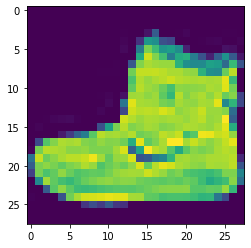

label: Ankle boot


In [15]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [20]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 4s - loss: 0.3935 - accuracy: 0.8587 - mae: 4.4200
Epoch 2/8
60000/60000 - 4s - loss: 0.3833 - accuracy: 0.8623 - mae: 4.4200
Epoch 3/8
60000/60000 - 4s - loss: 0.3766 - accuracy: 0.8630 - mae: 4.4200
Epoch 4/8
60000/60000 - 4s - loss: 0.3676 - accuracy: 0.8664 - mae: 4.4200
Epoch 5/8
60000/60000 - 4s - loss: 0.3634 - accuracy: 0.8661 - mae: 4.4200
Epoch 6/8
60000/60000 - 4s - loss: 0.3575 - accuracy: 0.8681 - mae: 4.4200
Epoch 7/8
60000/60000 - 4s - loss: 0.3509 - accuracy: 0.8707 - mae: 4.4200
Epoch 8/8
60000/60000 - 4s - loss: 0.3470 - accuracy: 0.8721 - mae: 4.4200


#### Plot training history

In [21]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.393472,0.858717,4.420000
1,0.383324,0.862317,4.420000
2,0.376576,0.862983,4.420000
3,0.367554,0.866400,4.420000
4,0.363415,0.866117,4.420001


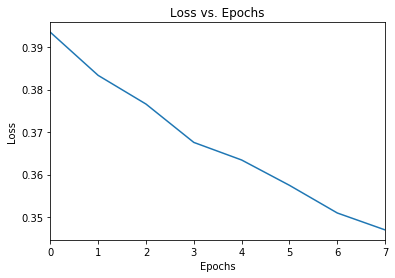

In [23]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss');

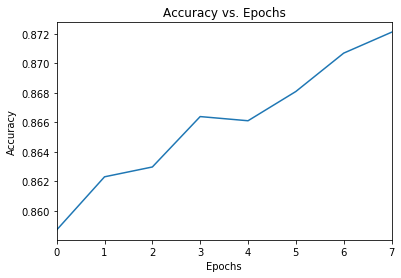

In [24]:
# Make a plot for the accuracy

loss_plot = df.plot(y='accuracy', title="Accuracy vs. Epochs", legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Accuracy');

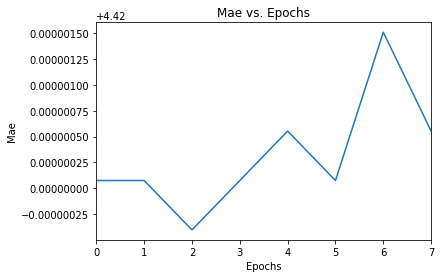

In [25]:
# Make a plot for the additional metric

loss_plot = df.plot(y='mae', title="Mae vs. Epochs", legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Mae');

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [31]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 1s - loss: 0.3452 - accuracy: 0.8589 - mae: 4.4200


#### Make predictions from the model

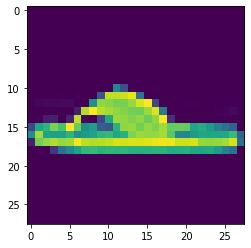

Label: Sandal


In [32]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [37]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model Prediction: {labels[np.argmax(predictions)]}")

Model Prediction: Sandal
